## Chapter 1.2.1. - *Deciding between multiple data authors*

Look up "US GDP data" in your web browser of choice. 

<div>
<img src="../imgs/gdp_webquery.png" width="500"/>
<div> 
<br>

How many potential data sources can you find in just a minute? 10? 20? 100? Is one clearly better than the others? Despite looking up 'US GDP data,' are all sources providing you with the same values in their data stores? Which one would you use in what circumstances?

In a way, all data sourcing practices are trying to solve this exact problem: reasonably decide between multiple data authors. The issues we'll talk about later in this chapter and others are all, in some way, shape, or form, determined by who the data author is (even if it's yourself) and what decisions they chose to make when collecting and crafting the dataset. 

For now, let's explore a few different GDP datasets and consider which one we might choose and why:

### ***CODING EXERCISE:***

In [1]:
# importing some libraries: 
import os                           # use: file management and access 
import pandas as pd                 # use: data intake and manipulation 

In [2]:
""" DATA SOURCING: DIFFERENT DATA AUTHORS """
# when I look up 'US GDP data', the first result is from the Bureau of Economic Advisors (BEA): 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 
bea_data = pd.read_csv(datasets_dir + 'gdp_bea_q2_2022_adv.csv' , encoding='utf-8')

# how's it structured? is it usable?
print(bea_data.head(10))

  Table 2. Contributions to Percent Change in Real Gross Domestic Product  \
0                                               Line                        
1                                               Line                        
2                                               Line                        
3                                                NaN                        
4                                                  1                        
5                                                NaN                        
6                                                  2                        
7                                                  3                        
8                                                  4                        
9                                                  5                        

                           Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                                 NaN     2019.00     2020.00     2021.00  

In [3]:
# I can also find more GDP data through other official-sounding organizations: 
# e.g., GDP data from the St. Louis Federal Reserve (FRED): 
fred_data = pd.read_csv(datasets_dir + 'gdp_fred.csv' , encoding='utf-8')
print(fred_data.head(10))

        DATE      GDP
0   1/1/1947  243.164
1   4/1/1947  245.968
2   7/1/1947  249.585
3  10/1/1947  259.745
4   1/1/1948  265.742
5   4/1/1948  272.567
6   7/1/1948  279.196
7  10/1/1948  280.366
8   1/1/1949  275.034
9   4/1/1949  271.351


In [4]:
# how about GDP data from a random website? here's some from macrotrends.net:
macrotrends_data  = pd.read_csv(datasets_dir + 'gdp_macrotrends.csv', encoding='utf-8')
print(macrotrends_data.head(10))

                           Macrotrends Data Download Unnamed: 1 Unnamed: 2  \
0                                                NaN        NaN        NaN   
1                                 U.S. GDP 1960-2022        NaN        NaN   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4  DISCLAIMER AND TERMS OF USE: HISTORICAL DATA I...        NaN        NaN   
5  FOR INFORMATIONAL PURPOSES - NOT FOR TRADING P...        NaN        NaN   
6  NEITHER MACROTRENDS LLC NOR ANY OF OUR INFORMA...        NaN        NaN   
7  FOR ANY DAMAGES RELATING TO YOUR USE OF THE DA...        NaN        NaN   
8                                                NaN        NaN        NaN   
9                                                NaN        NaN        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8     

Do these different data sources look even remotely similar? Despite all being search results for 'US GDP data,' what are some ways that these data sources are different? 

[comment]: <> (Go into Excel csv's. Have discussion - notable differences: structure, units frequency/time scale, commerical/gov't sourcing, advance/second/third/latest estimate)

Among others, a key difference in these data resources is ***usability***. As provided, we can visualize and manipulate the FRED data most easily using code:

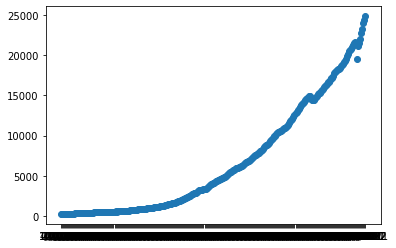

In [5]:
import matplotlib.pyplot as plt     # use: custom data visualization 

# generate a simple scatter plot of the GDP by date: 
plt.scatter(fred_data['DATE'], fred_data['GDP'])

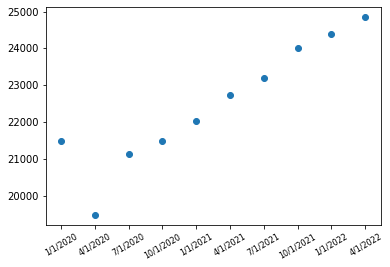

In [6]:
# that's a lot of data - how about just the most recent observations? 
fred_data_subset = fred_data.tail(10)

# let's make sure things are a litte more read-able on the x-axis:
plt.xticks(rotation = 30, fontsize = 8)
plt.scatter(fred_data_subset['DATE'], fred_data_subset['GDP'])

### ***DISCUSSION 1:***

From this quick exploration and visualization exercise, we can see that the FRED data is a timeseries dataset which appears relatively clean and ready for analysis - it contains only two columns: ```DATE``` and ```GDP```. You might be tempted to just go ahead and run with it. But, for official and/or frequently-used statistics in particular, it's worth taking a step back from usability during the data sourcing process. Why? 

1. Individuals and groups may publish their own versions of statistics which are usable, but perhaps not official. Using the official source can establish credibility for your research. 

2. Or, maybe these off-shoot datasets are based on the official version, but have been processed in a meaningful way. 

    * e.g., the FRED data (found [here](https://fred.stlouisfed.org/series/GDP)) is notated as 'GDP, Billions of Dollars, Seasonally Adjusted Annual Rate'. Maybe this adjustment isn't desirable for your research. <br></br>
  
3. Particular fields or subjects may have reputable and established datasets that not only can make your research more credible but also easier through the use of existing analytic tools and techniques others have developed for similar research! 

Point 1 (i.e., using official/licensed data authors for choice statistics) is especially key for social science research (where less direct experimentation and independent data collection may be performed). For US GDP data, a quick web query of *"Who measures US GDP?"* informs us that the Bureau of Economic Analysis (BEA) is responsible for its publication while the Bureau of Labor Statistics collects the raw data used for GDP calculation ([source 1](https://www.investopedia.com/ask/answers/031715/how-does-united-states-government-measure-economic-growth.asp#:~:text=The%20U.S.%20government%20collects%20and,GDP%20and%20the%20national%20income.), [source 2](https://www.commerce.gov/data-and-reports/economic-indicators)). 

### ***DISCUSSION 2:***

One of our datasources was the BEA, but it's still a good idea to perform a trace and identify the most base-level resource used to generate each of our potential datasets. After all, multiple or all of them could be re-releases of BEA data, making them equally reputable! For our remaining datasets: 

* FRED GDP data is co-opted from the [BEA](https://fred.stlouisfed.org/series/GDP#:~:text=NOTES-,Source%3A%20U.S.%20Bureau%20of%20Economic%20Analysis,-Release%3A%20Gross)'s release; and

* The GDP data from macrotrends.net is sourced from the [World Bank](https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product#:~:text=Data%20Source%3A%20World%20Bank), which in turns computes their GDP measures from World Bank and OECD (Organisation for Economic Co-operation and Development) [national accounts data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2019&locations=US&start=1990#:~:text=Also%20Show,Details).

If you're okay with it, go ahead and trust me that the BEA and World Bank are fairly reputable sources. Now that we've done some initial data exploration and sourcing inspections, let's summarize what we know and return to the original question underlying all data sourcing practices: *which dataset do we choose, and why?* 

<center>
                                                   <strong>Table 1. GDP dataset characteristics</strong>
<br><br>

| Listed source | Base source     | Collecting organization | Data type       | Timeframe              | Notable features         |
|---------------|-----------------|-------------------------|-----------------|------------------------|--------------------------|
| BEA           | BEA             | Government              | Cross-sectional | Point-in-time, 2022 Q2 | GDP by sector            |
| FRED          | BEA             | Government              | Timeseries      | Annual, 1947-2022      | Seasonally adjusted      | 
| MacroTrends   | Worldbank, OECD | International Body      | Timeseries      | Annual, 1960-2022      | Add. calcs like % change | 

</center>

### ***DISCUSSION 3:***

Considering that all of potential data sources come from similarly reputable authors, which one should we use? And by now, you may have noticed that I've been purposely vague as to what this data will be used for - intentionally, I promise! And that's because, if author credibility is established, which dataset you choose to use *ultimately depends on your specific application.* 

Perhaps you require a by-sector breakdown of GDP, and would like to opt for the BEA data (which can be transformed into cross-sectional timeseries data, aka panel data, by merging with other datasets). Or, if you just need some numbers to run a quick analysis for your own use, FRED data could be the best. And if you need slightly richer timeseries data, MacroTrends could be the ideal source. 

Other than original author credibility, here are some other metrics you may consider using when sourcing data: 

<br>
<center>
<strong>Figure 1. Data sourcing criteria</strong>
<br><br>
<img src="../imgs/datasource_criteria.svg" width="700"/>
</center> 

### ***CONCLUSION:***

Now you might be asking yourself, source tracebacks and verfication are well and good, but rather time-consuming. If you need to decide between only 3-10 datasets, this case-by-case assessment is feasible, but what if you're starting a project from the ground up? There could be hundreds if not thousands of datasets you need to evaluate. Surely there's a quicker way to do some sort of preliminary filtering of source viability...